In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime                                                                   # Importing necessary libraries
from datetime import date
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset

data = pd.read_excel("marketing_campaign.xlsx")

# Display basic information about the dataset

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
row_count = len(data)

In [4]:
print("Number of rows:", row_count)

Number of rows: 2240


In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [9]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


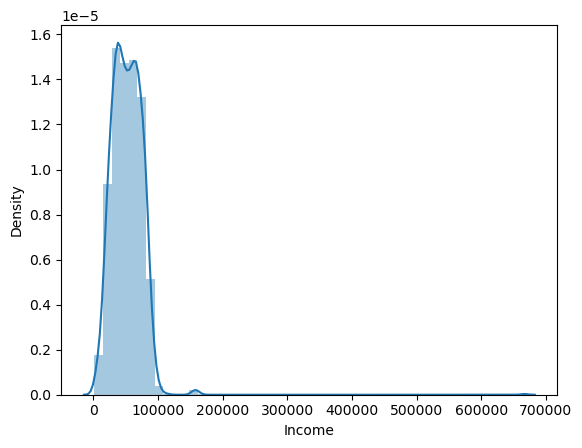

In [10]:
sns.distplot(data['Income'])
plt.show()

##### since the data is left skewed we will replace the missing values with median

In [12]:
# Calculate the meadian income
data['Income'] = data['Income'].fillna(data['Income'].median())
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [14]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

#####  "Z_CostContact" and "Z_Revenue " have same value in all the rows, so we can drop them.

In [16]:
data= data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [17]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

####   Univariate Analysis:-
##### 1. Aanlysis on Year_Birth Variable.

In [19]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
print("Unique categories present in the Year_Birth:",data["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


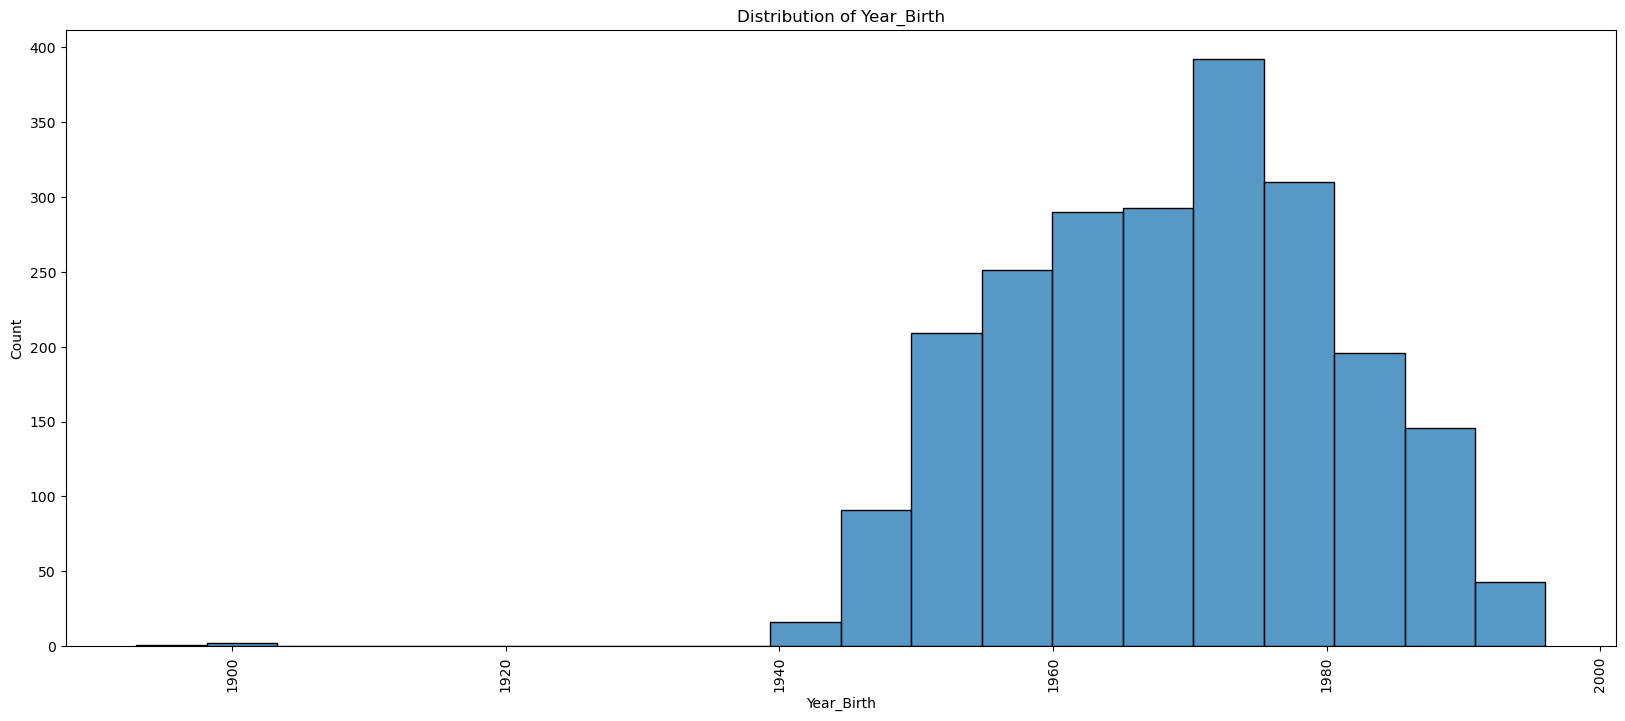

In [20]:
def uni_V(col):
    plt.figure(figsize=(20, 8))
    sns.histplot(data[col], bins=20, kde=False)  # Use histplot for numeric columns
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Apply the function
uni_V("Year_Birth")

##### 2. Analysis on Education Variable

In [22]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [23]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY...
data['Education'] = data['Education'].replace(['Graduation', 'PhD','Master', '2n Cycle'],'Post Graduate')
data['Education'] = data['Education'].replace(['Basic'], 'Under Graduate')

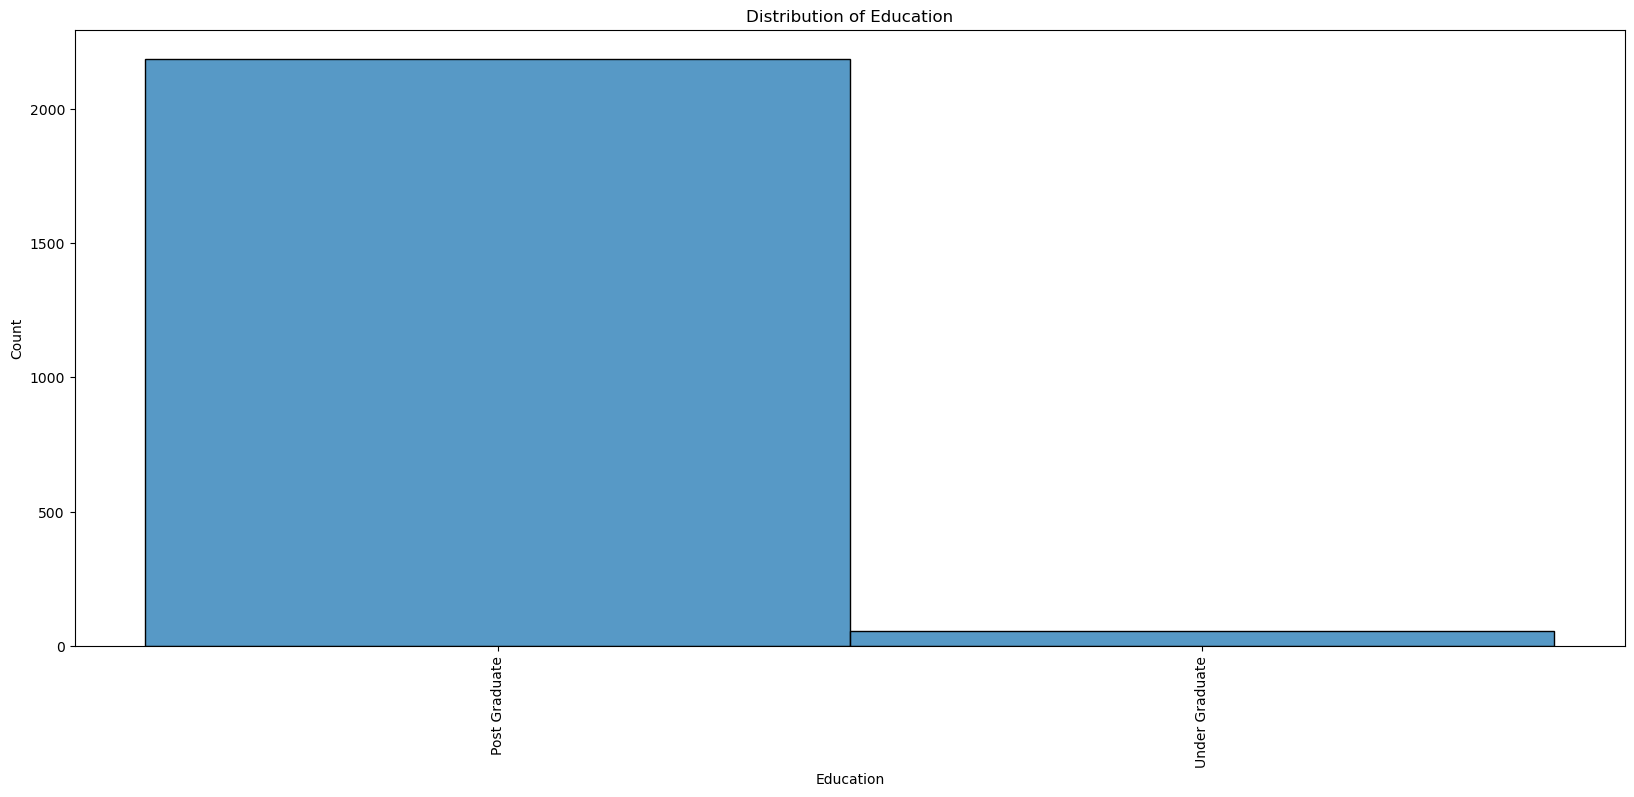

In [24]:
uni_V('Education')

##### We observed that most of the data points here are post-Graduated

##### 3. Aanalysis on Marital_Status Variable

In [27]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [28]:
#REPLACING THE CONFLICT VALUES IN MARITAL STATUS...
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

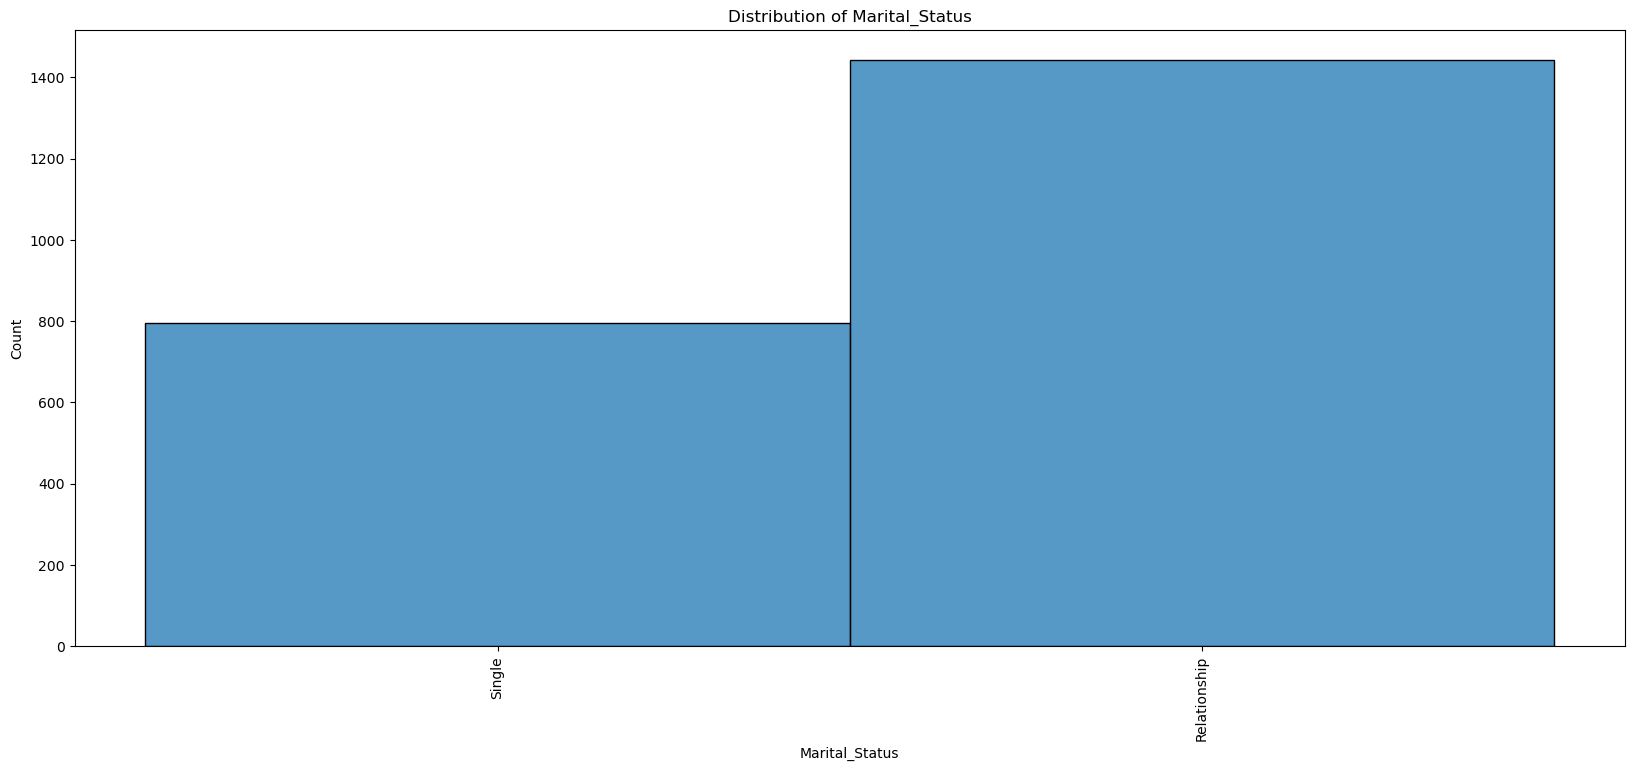

In [29]:
uni_V('Marital_Status')

##### 3. Aanalysis on Income Variable

In [31]:
data["Income"].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

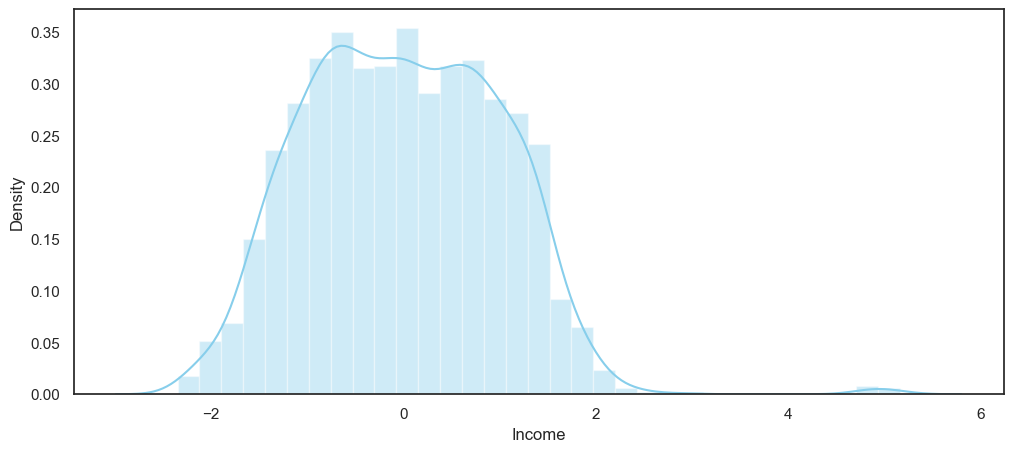

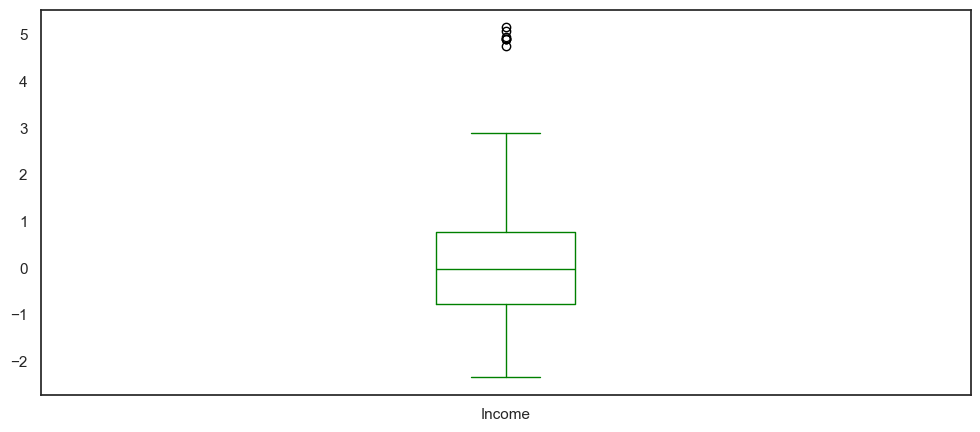

In [292]:
plt.figure(figsize=(12,5))
sns.distplot(data['Income'],color = 'skyblue')
plt.show()
data['Income'].plot.box(figsize=(12,5),color = 'green')
plt.show()

#### The income column is left skewed as we saw earlier but it has some outliers.

#### 5. Analysis on 'Kidhome','Teenhome' Variable

In [35]:
data['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [36]:
data['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [37]:
#COMBINING DIFFERENT DATAFRAME INTO SINGLE COLUMN TO REDUCE THE NUMBER OF DIMENSION

data['Kids'] = data['Kidhome'] + data['Teenhome']

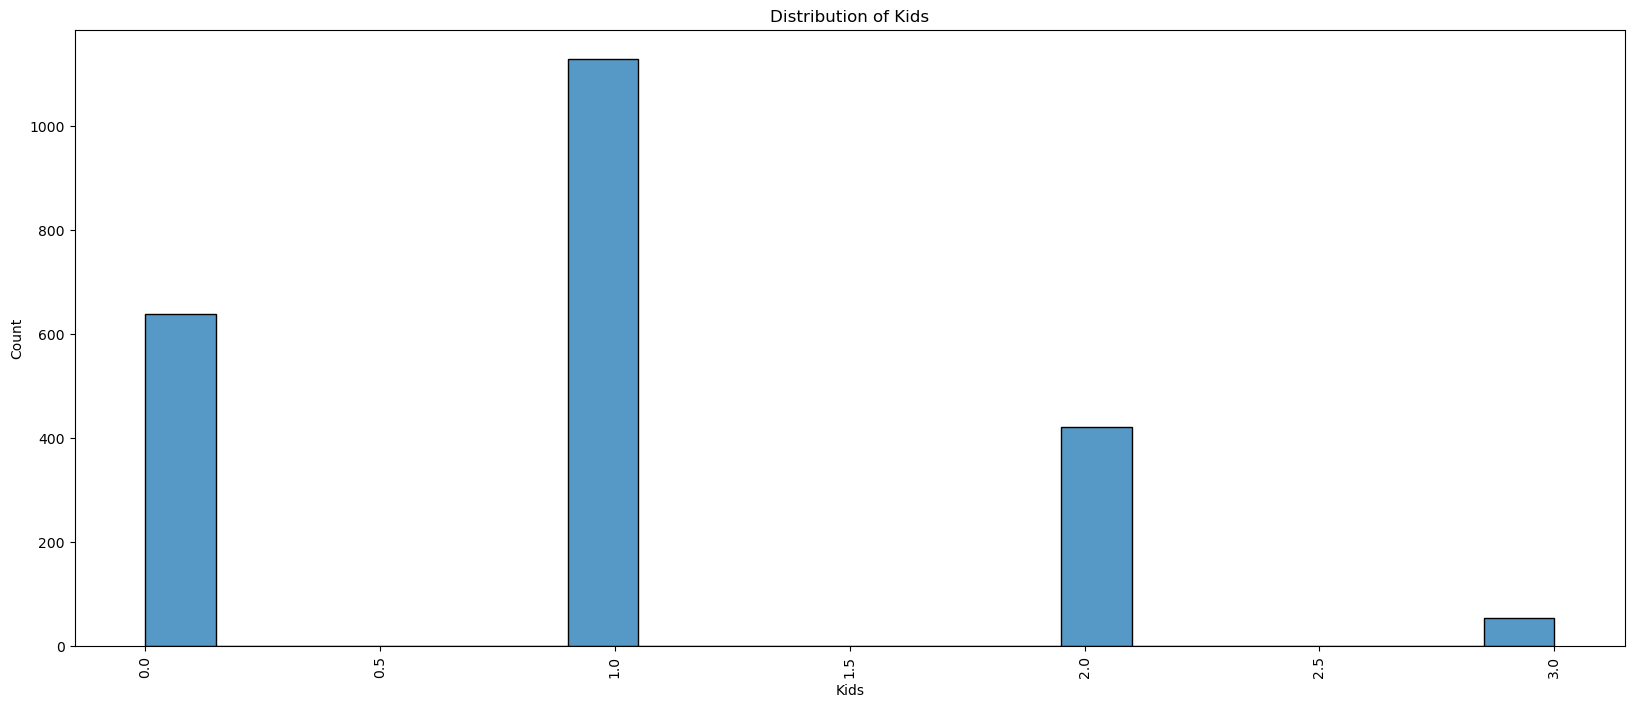

In [38]:
uni_V('Kids')

#### 50.35% of Customers in the dataset have 1 kid. 28.48% of Customers in the dataset have no kids. 18.79% of Customers in the dataset have 2 kids. 2.36% of Customers in the dataset have 3 kids.

#### 6. Analysis On "MntWines, MntMeat Products, MntFish Products, MntSweetProducts, MntGoldProds" Variable.

In [41]:
data[['MntFruits', 'MntMeatProducts']].head()

,MntFruits,MntMeatProducts
0,88,546
1,1,6
2,49,127
3,4,20
4,43,118


In [42]:
data['MntFishProducts'].nunique()

182

In [43]:
data['MntFruits'].nunique()

158

In [44]:
#COMBINING DIFFERENT DATAFRAME INTO A SINGLE COLUMN TO REDUCE THE NUMBER OF DIMENSIONS
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts']  + data['MntFishProducts']+ data['MntSweetProducts'] + data['MntGoldProds']
data['Expenses'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Expenses, dtype: int64

In [45]:
data['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

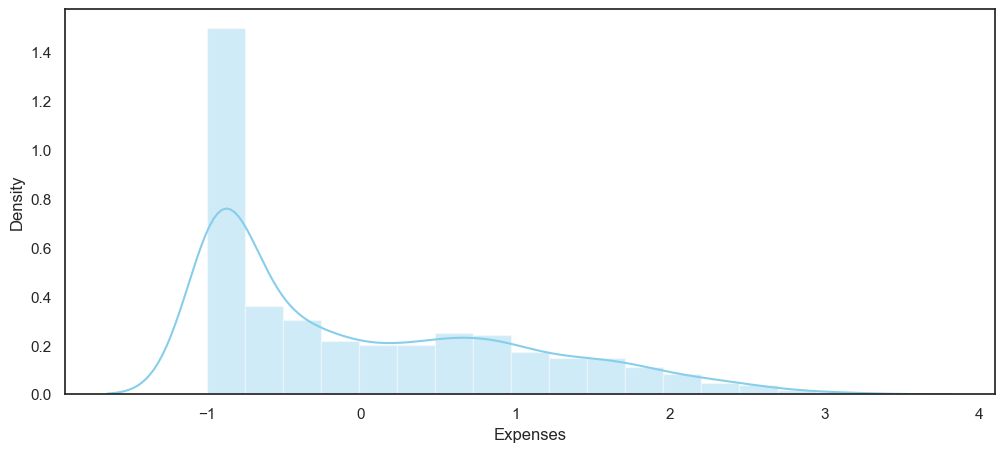

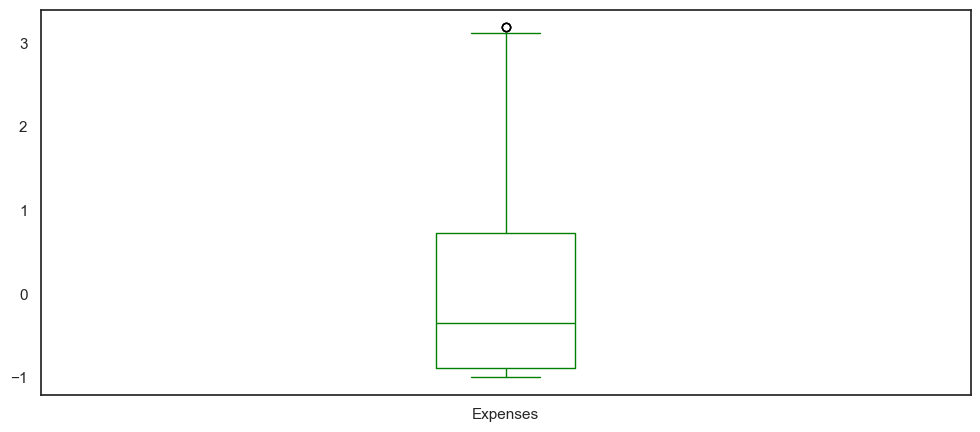

In [290]:
plt.figure(figsize=(12,5))
sns.distplot(data['Expenses'],color = 'skyblue')
plt.show()
data['Expenses'].plot.box(figsize=(12,5),color = 'green')
plt.show()

#### The distribution of expenses is uniform

#### 7. Analysis on "AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5" Variable.

In [49]:
data['AcceptedCmp1'].unique()

array([0, 1], dtype=int64)

In [50]:
data['AcceptedCmp2'].unique()

array([0, 1], dtype=int64)

In [51]:
data['AcceptedCmp3'].unique()

array([0, 1], dtype=int64)

In [52]:
data['AcceptedCmp4'].unique()

array([0, 1], dtype=int64)

In [53]:
data['AcceptedCmp5'].unique()

array([0, 1], dtype=int64)

In [54]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [55]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"

print("Unique categories present in the TotalAcceptedCmp:",data['TotalAcceptedCmp'].value_counts())

Unique categories present in the TotalAcceptedCmp: 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64


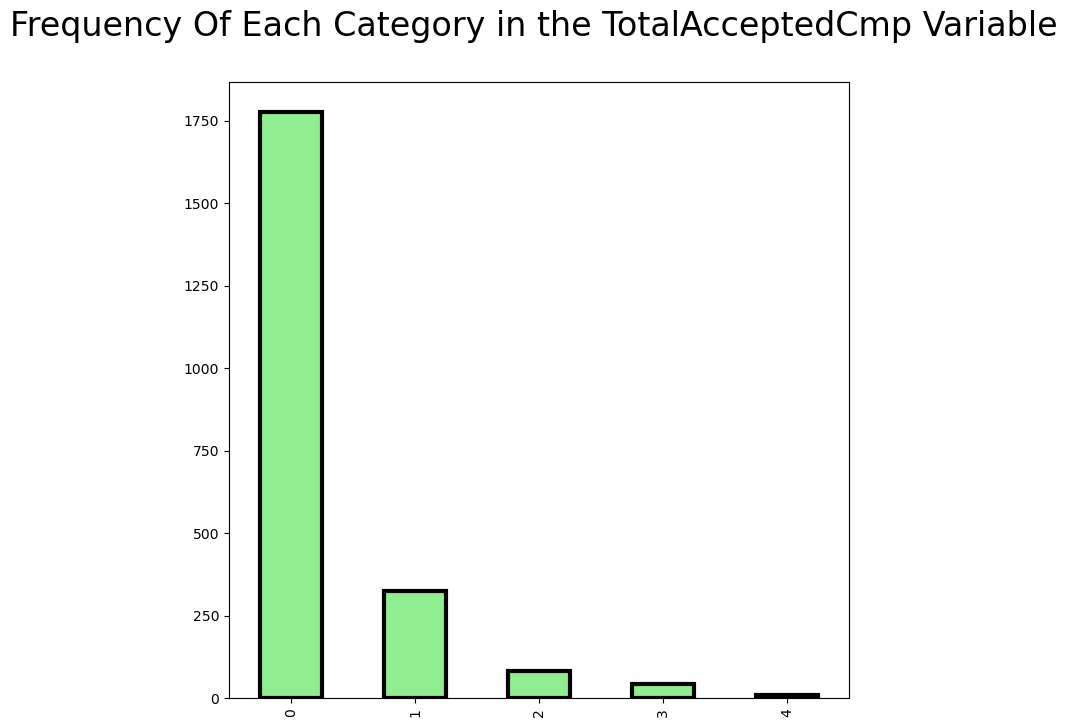

In [56]:
#VISUALIZING THE "TotalAcceptedCmp"
plt.figure(figsize=(8,8))

data['TotalAcceptedCmp'].value_counts().plot(kind='bar', color = 'lightgreen', edgecolor = "black", linewidth = 3)

plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n", fontsize=24)

plt.show()

#### 79.33% of Customers accepted the offer in the campaign are "0". 14.50% of Customers accepted the offer in the campaign are "1" 3.70% of Customers accepted the offer in the campaign are "2", 1.96% of Customers accepted the offer in the campaign are "3" 0.49% of Customers accepted the offer in the campaign are "4"

#### 8. Analysis on "NumWebPurchases, Num Catalog Purchases, NumStore Purchases, NumDeals Purchases" Vanable.

In [59]:
data['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [60]:
data['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [61]:
data['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [62]:
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
data['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [63]:
data[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [64]:
data['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

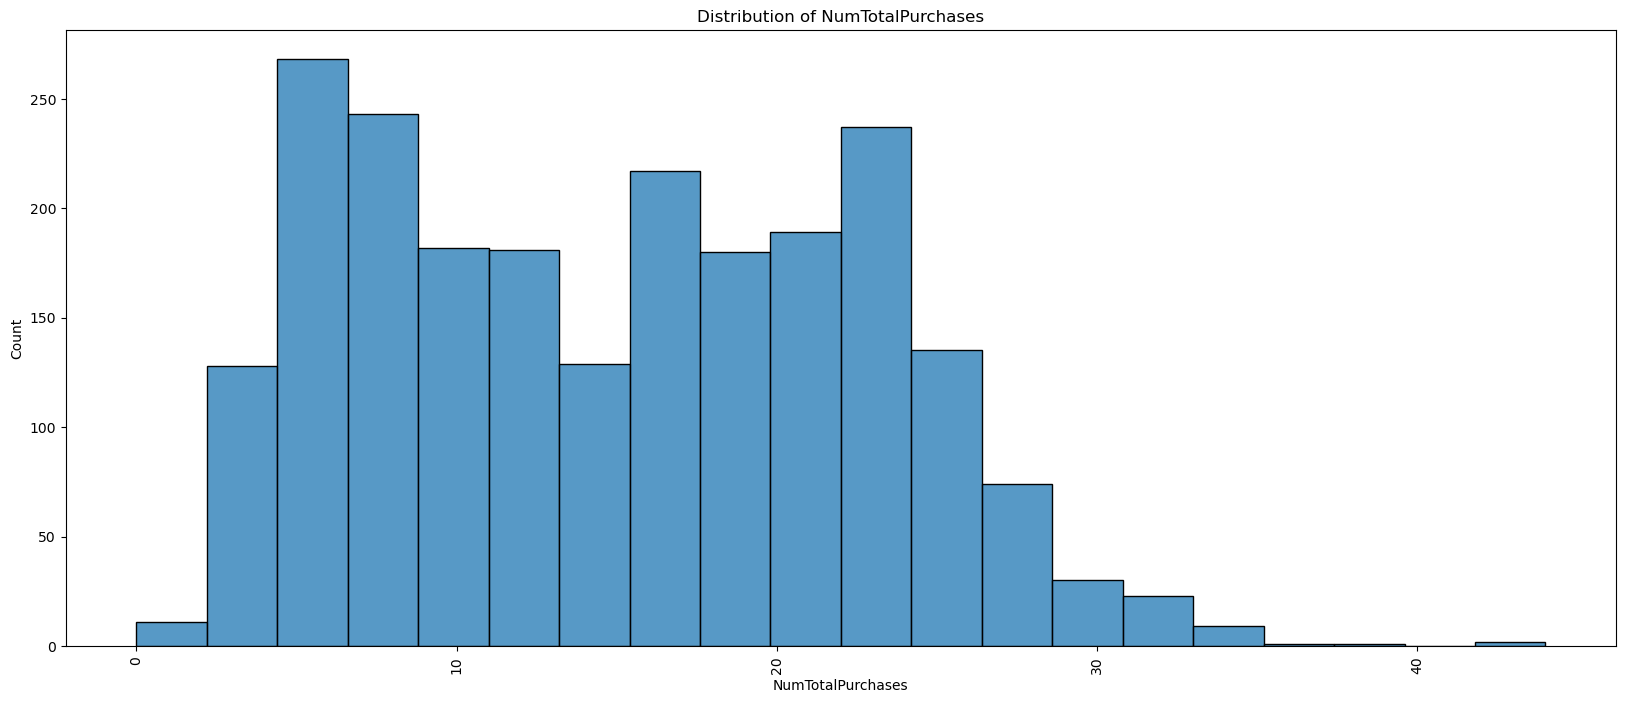

In [65]:
uni_V('NumTotalPurchases')

In [66]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,2,27,0,6
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,1,53,0,8
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,1,422,0,19


In [67]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

#### 9. Covnverting the 'Year_Birth' to customer_Age

In [69]:
# ADDING A COLUMN "customer_Age" IN THE DATAFRAME

data['customer_Age'] = (pd.Timestamp('now').year) - data['Year_Birth']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,0,1617,0,25,68
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,2,27,0,6,71
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,776,0,21,60
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,1,53,0,8,41
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,1,422,0,19,44


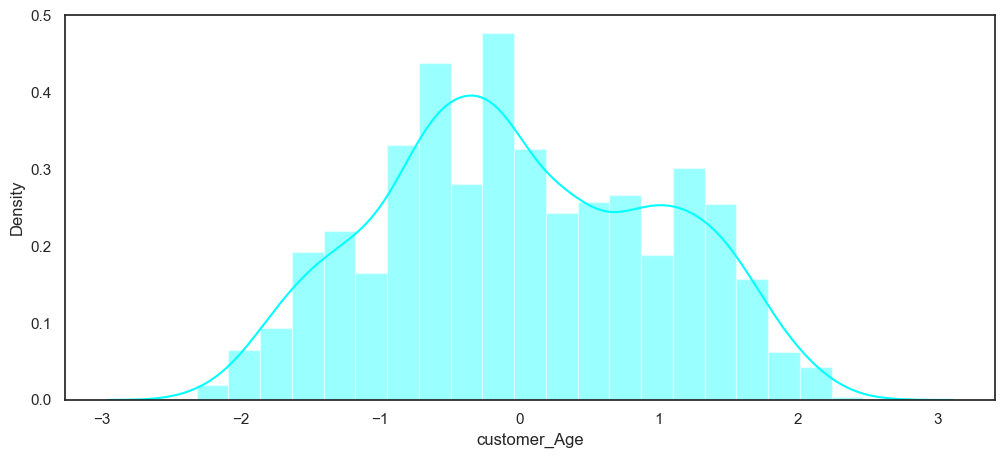

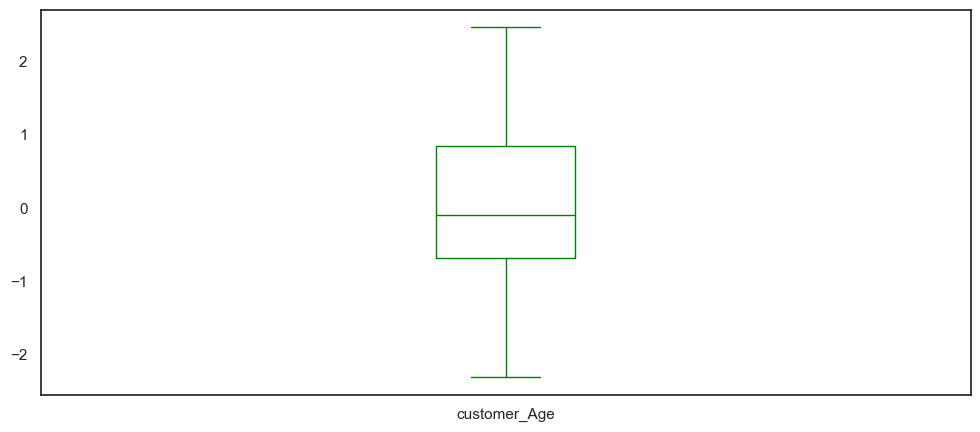

In [294]:
plt.figure(figsize=(12,5))
sns.distplot(data['customer_Age'],color = 'cyan')
plt.show()
data['customer_Age'].plot.box(figsize=(12,5),color = 'green')
plt.show()

#### Most of the customers we have are in middle age i.e between 35-55

In [72]:
#DELETING SOME COLUMNS

col_del = ['Year_Birth', 'ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
data = data.drop(columns = col_del,axis=1)

In [73]:
data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,68
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,71
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,60
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,41
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,44


In [74]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Complain', 'Response', 'Kids', 'Expenses', 'TotalAcceptedCmp',
       'NumTotalPurchases', 'customer_Age'],
      dtype='object')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2240 non-null   object        
 1   Marital_Status     2240 non-null   object        
 2   Income             2240 non-null   float64       
 3   Dt_Customer        2240 non-null   datetime64[ns]
 4   Recency            2240 non-null   int64         
 5   Complain           2240 non-null   int64         
 6   Response           2240 non-null   int64         
 7   Kids               2240 non-null   int64         
 8   Expenses           2240 non-null   int64         
 9   TotalAcceptedCmp   2240 non-null   int64         
 10  NumTotalPurchases  2240 non-null   int64         
 11  customer_Age       2240 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 210.1+ KB


In [76]:
data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,68
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,71
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,60
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,41
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,44


In [77]:
data.drop(['Dt_Customer', 'Recency', 'Complain', 'Response'], axis=1, inplace=True)

In [78]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age
0,Post Graduate,Single,58138.0,0,1617,0,25,68
1,Post Graduate,Single,46344.0,2,27,0,6,71
2,Post Graduate,Relationship,71613.0,0,776,0,21,60
3,Post Graduate,Relationship,26646.0,1,53,0,8,41
4,Post Graduate,Relationship,58293.0,1,422,0,19,44


In [79]:
data.shape

(2240, 8)

## Bivariate Analysis :-

### 1. Education Vs Expenses

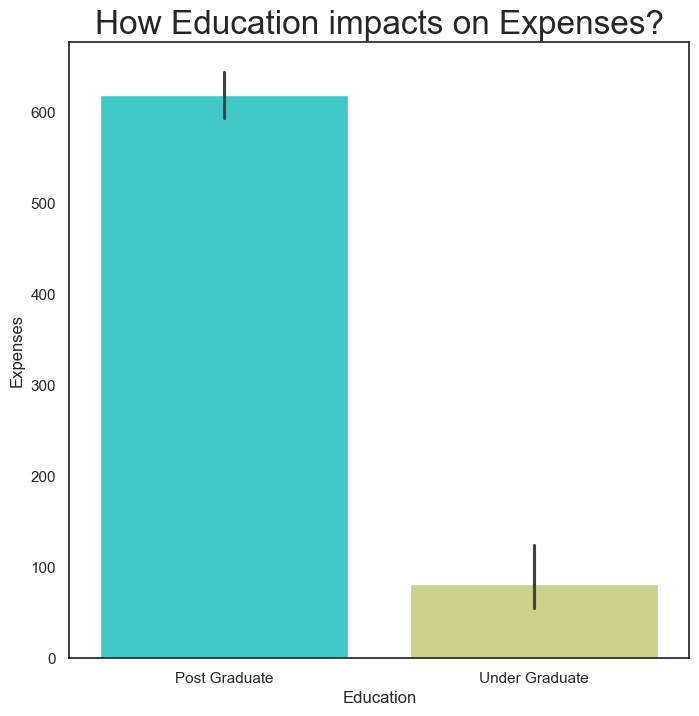

In [82]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?", fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=data,palette="rainbow")

#### We observe that the Post Graduated people spends more than the UG people

### 2. Marital status Vs Expenses

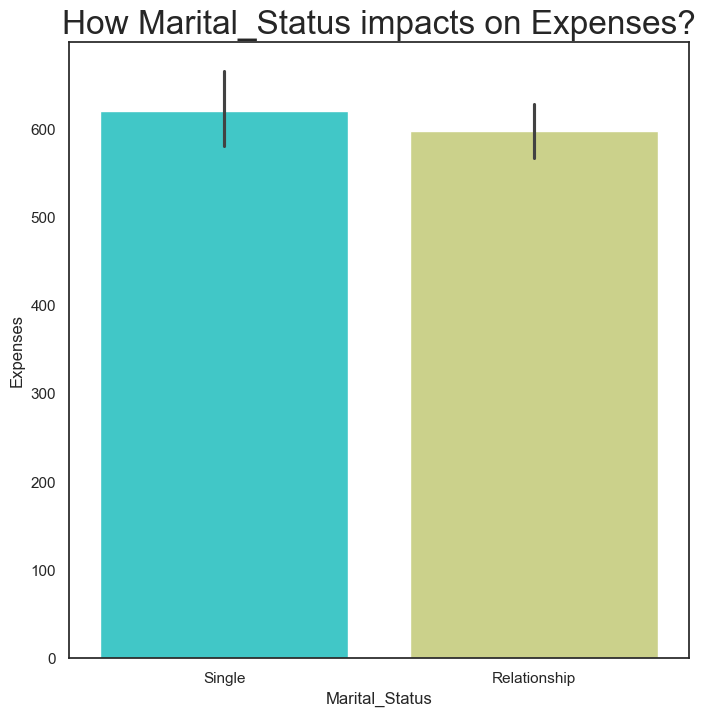

In [85]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?", fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=data,palette="rainbow")

#### We observe that single and married people have the same spendings

### 3. Kids Vs Expenses

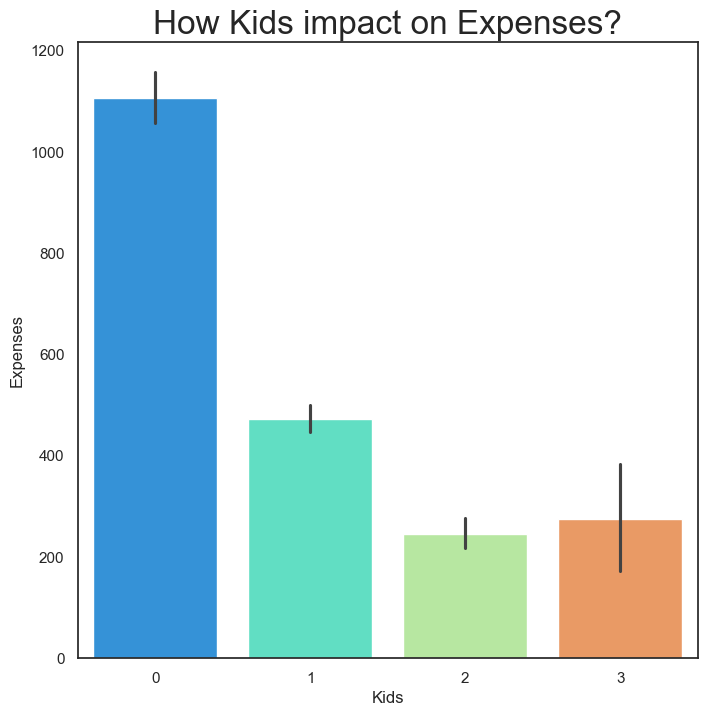

In [88]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impact on Expenses?",fontsize=24)
ax = sns.barplot(x = "Kids", y = "Expenses", data=data, palette="rainbow")

#### Here we have observed something different that parents with 1 kid spends more than parents who are having 2 or 3 kids

### 4. TotalAcceptedCmp Vs Expenses

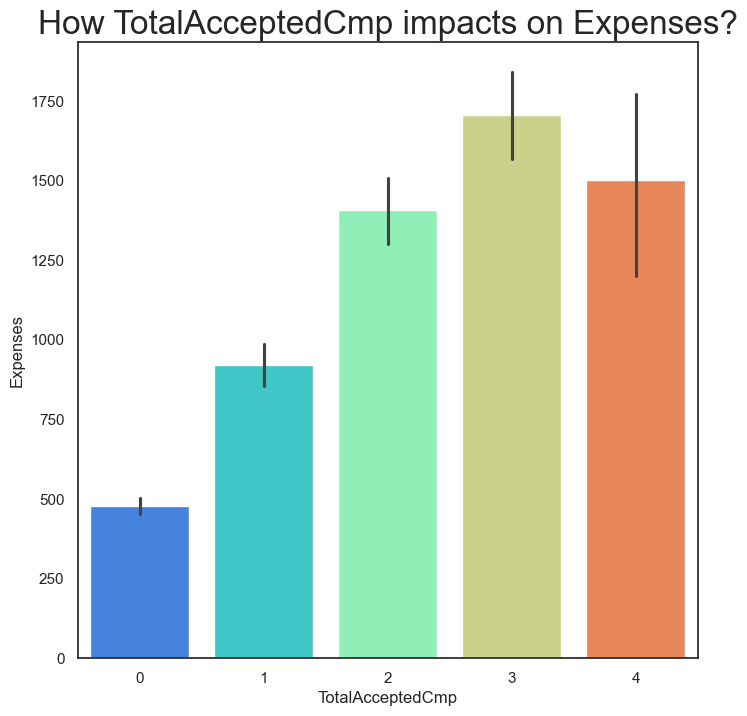

In [91]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x = "TotalAcceptedCmp", y = "Expenses", data=data, palette="rainbow")

#### Those who accepted more campaign have more expenses

### 5. NumTotalPurchases Vs Expenses

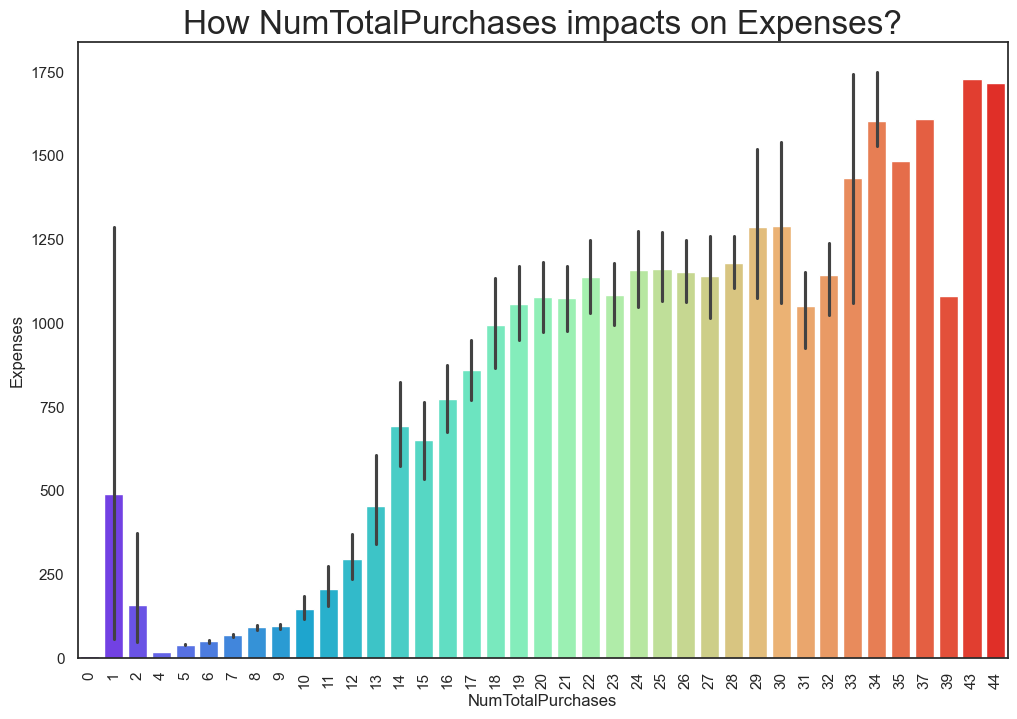

In [94]:
sns.set_theme(style="white")
plt.figure(figsize=(12,8))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x = "NumTotalPurchases", y = "Expenses", data=data, palette="rainbow")

#### Those who have more purchases have more expenses

### 6. Customer Age Vs Expenses

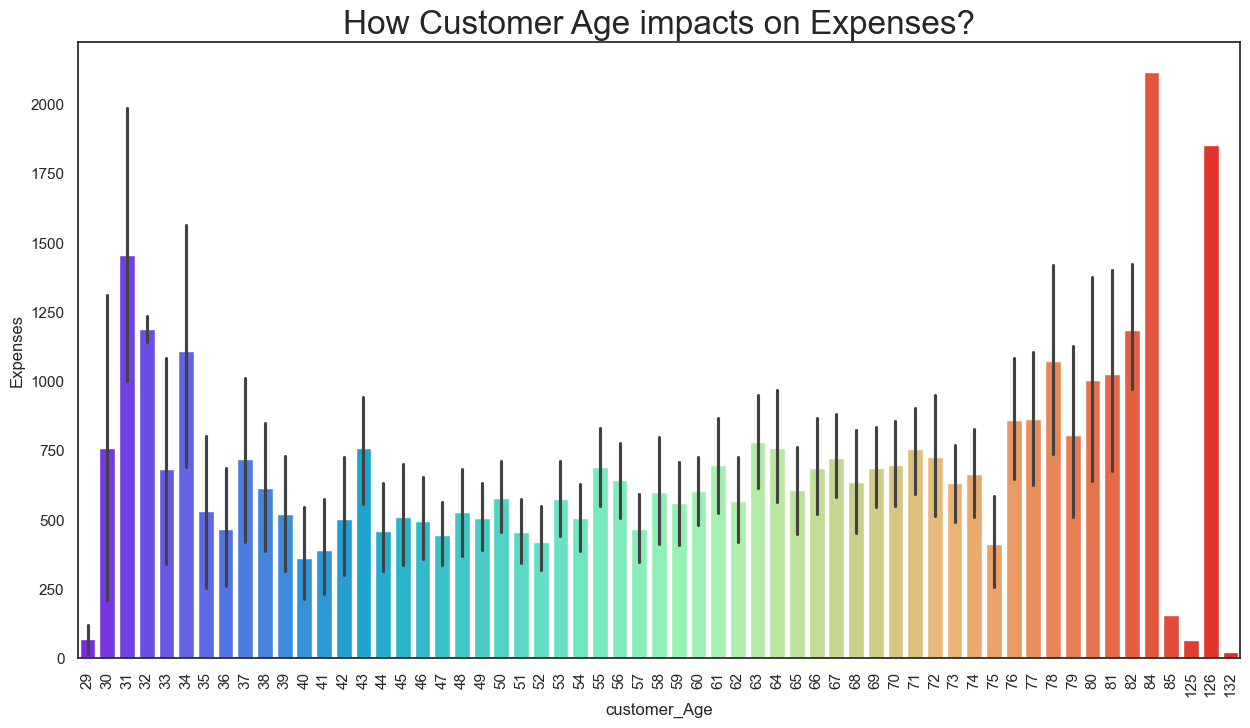

In [97]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Customer Age impacts on Expenses?",fontsize=24)
ax = sns.barplot(x = "customer_Age", y = "Expenses", data=data, palette="rainbow")
plt.xticks(rotation=90)
plt.show()

#### People who are in middle age have less expenses than others

### Remove some outliers present in age and income

In [100]:
data['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [101]:
data.shape

(2240, 8)

In [102]:
data = data[data['customer_Age'] < 90]
data = data[data['Income'] < 300000]

In [103]:
data.shape

(2236, 8)

## Finding the correlation

<Axes: >

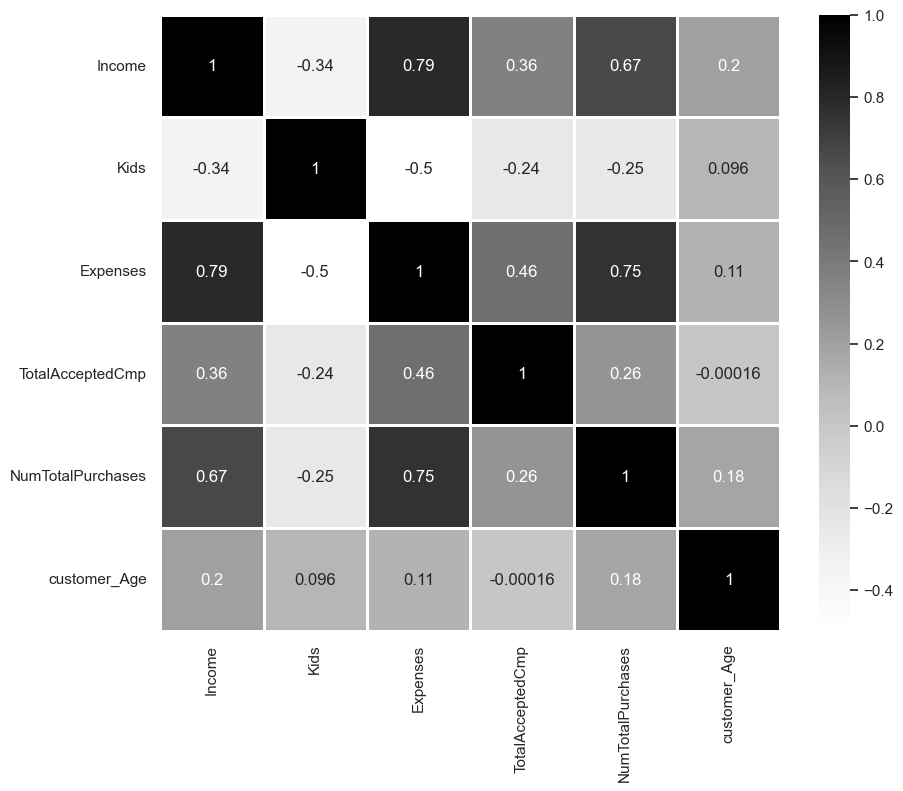

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap = 'Greys', linewidths=1)

#### Income is positively correlated to Expenses and Number of Purchases and negatively correlated with kids

In [107]:
# Encode categorical variables

label_encoder = preprocessing.LabelEncoder()

data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

In [108]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age
0,0,1,58138.0,0,1617,0,25,68
1,0,1,46344.0,2,27,0,6,71
2,0,0,71613.0,0,776,0,21,60
3,0,0,26646.0,1,53,0,8,41
4,0,0,58293.0,1,422,0,19,44


In [109]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'customer_Age'],
      dtype='object')

In [110]:
# standardise the data using standard scaler

scaler = StandardScaler()
col_scale = ['Income','Kids','Income', 'Kids', 'Expenses','TotalAcceptedCmp', 'NumTotalPurchases', 'customer_Age']
data[col_scale] = scaler.fit_transform(data[col_scale])

In [111]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298


In [112]:
X_0 = data.copy()

# Model Building

## Hierarchical clustering

In [115]:
# Apply PCA

pca = PCA(n_components=3)
PCA_data = pca.fit_transform(X_0)

Text(0.5, 1.0, 'Dendrogram')

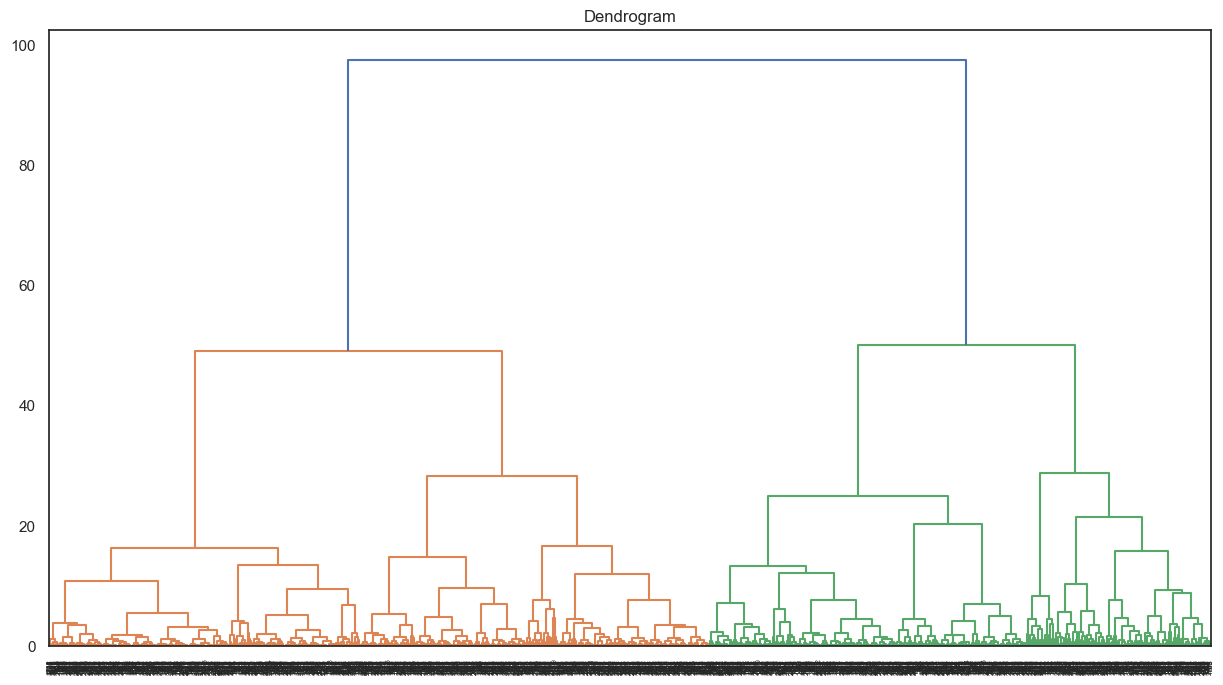

In [116]:
plt.figure(figsize=(15,8))
plt.title('Dendrograms')

sc.dendrogram(sc.linkage(PCA_data,method='ward'))
plt.title('Dendrogram')

**Agglomerative clustering**

In [118]:
X_1 = data.copy()

In [119]:
X_1.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298


In [120]:
#Initiating PCA to reduce dimensions features to 3

pca1 = PCA(n_components=3)
pca1.fit(X_1)

PCA_ds = pd.DataFrame(pca1.transform(X_1), columns = (["col1", "col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,1.747757e-17,1.723335,-2.809576,-1.597896,-0.267731,1.364005,5.522132
col2,2236.0,9.533221e-18,1.062686,-3.399761,-0.749634,0.011669,0.802052,2.892263
col3,2236.0,-9.533221e-18,0.875097,-2.362301,-0.548816,-0.098376,0.399480,4.542157


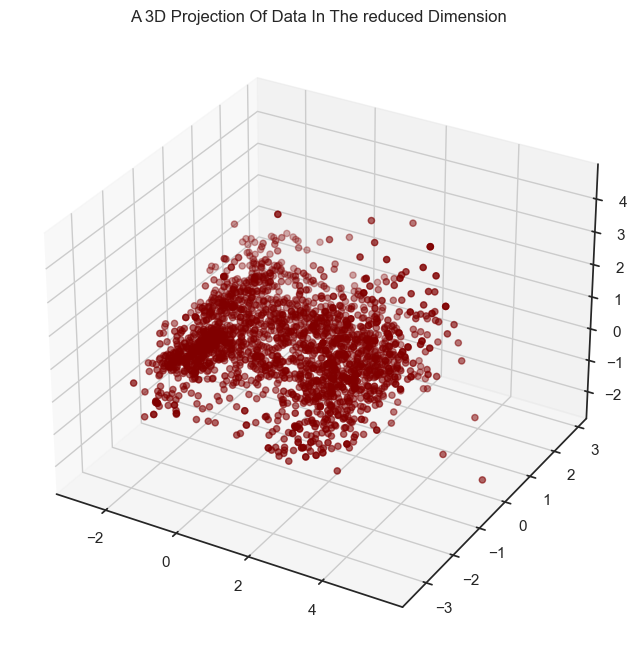

In [121]:
#A 3D Projection of data in the reduced dimension
x=PCA_ds["col1"]
y=PCA_ds["col2"]
z=PCA_ds["col3"]
 
#to plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The reduced Dimension")
plt.show()

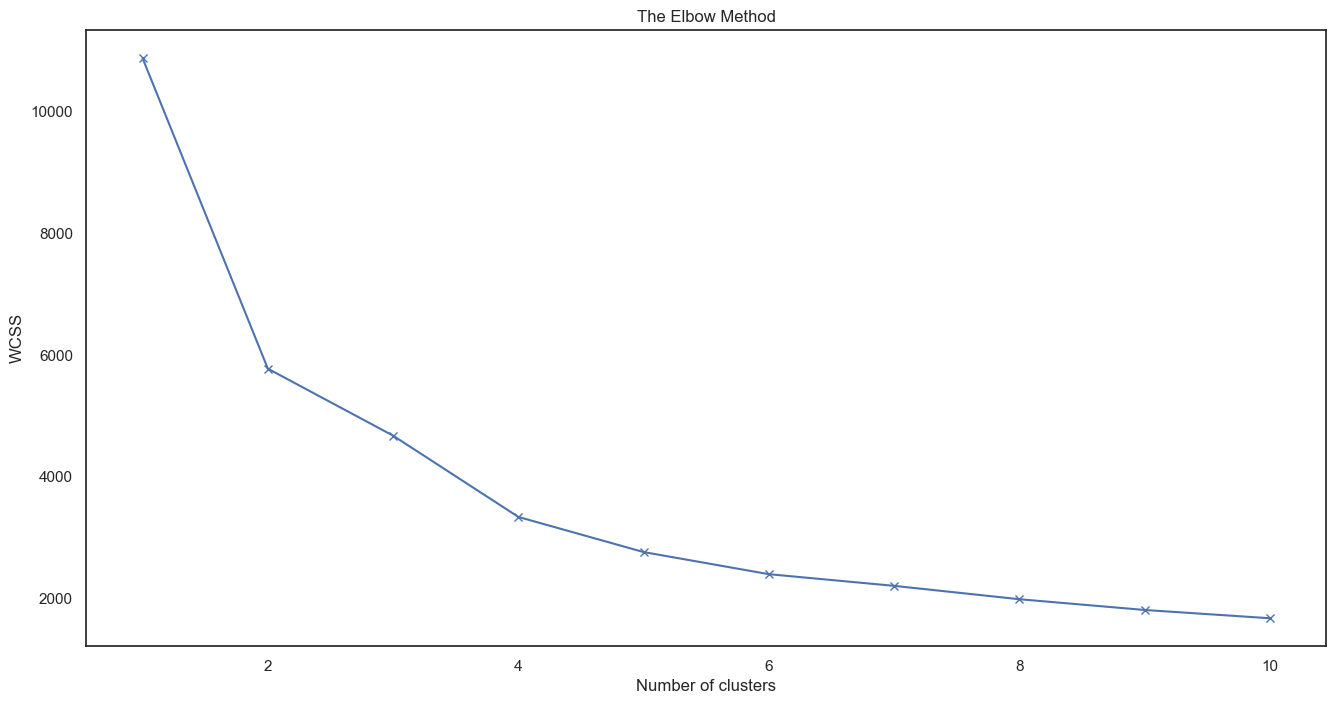

In [122]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

####  here we take k=2

In [125]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=2)

#fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the original dataframe.
X_1["Cluster_Agglo"] = yhat_AC +1

<Axes: xlabel='Expenses', ylabel='Income'>

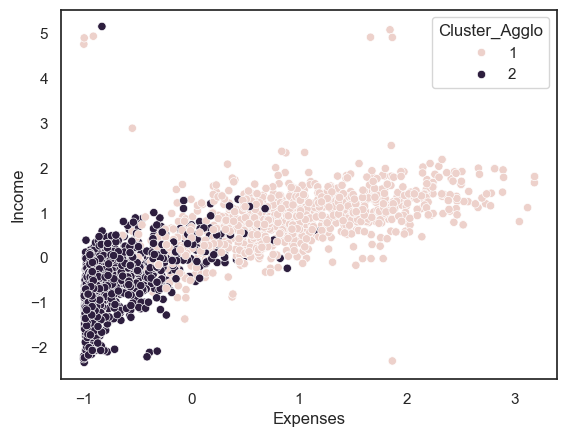

In [126]:
sns.scatterplot(x = X_1['Expenses'], y = X_1['Income'],hue=X_1['Cluster_Agglo'])

<Axes: xlabel='Kids', ylabel='Income'>

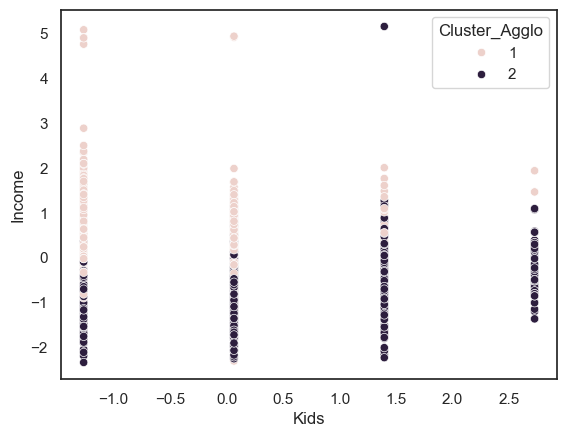

In [127]:
sns.scatterplot(x = X_1['Kids'], y = X_1['Income'],hue=X_1['Cluster_Agglo'])

<Axes: xlabel='Marital_Status', ylabel='Income'>

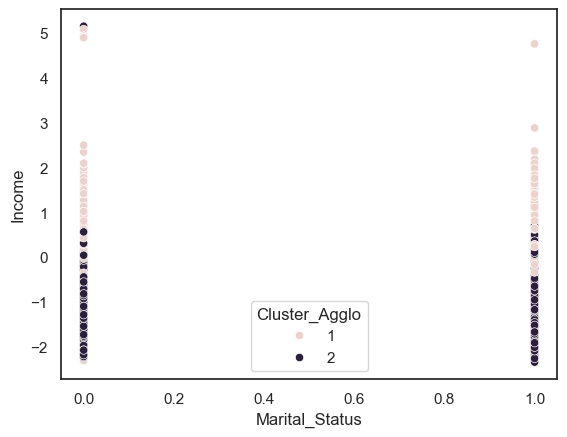

In [128]:
sns.scatterplot(x = X_1['Marital_Status'], y = X_1['Income'],hue=X_1['Cluster_Agglo'])

<Axes: xlabel='Income', ylabel='customer_Age'>

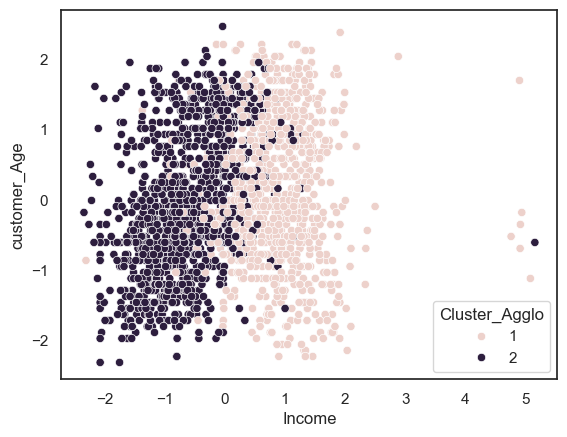

In [129]:
sns.scatterplot(x = X_1['Income'], y = X_1['customer_Age'],hue=X_1['Cluster_Agglo'])

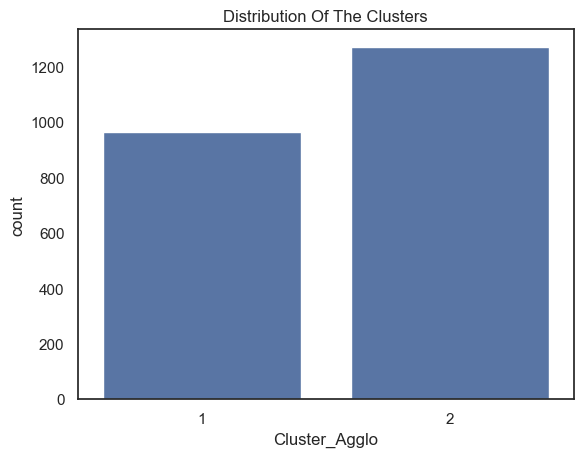

In [130]:
sns.countplot(x=X_1["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

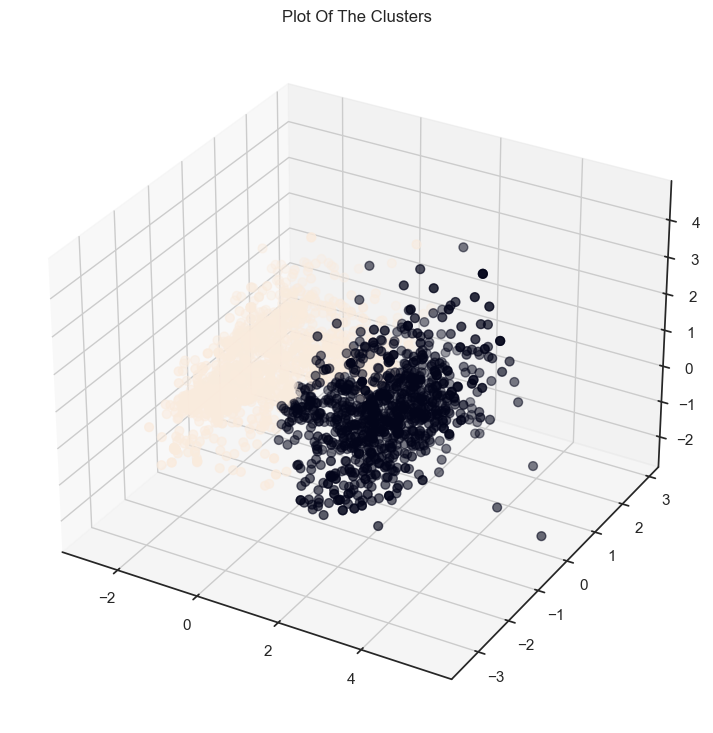

In [131]:
#Plotting the clusters
fig = plt.figure(figsize=(10,9))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y ,z, s=40, c=PCA_ds['Clusters'], marker='o')
ax.set_title("Plot Of The Clusters")
plt.show()

In [132]:
scoress = silhouette_score(PCA_data,X_1['Cluster_Agglo'])

print(f'Silhouette score for Agglomerative Clustering is : {scoress}')

Silhouette score for Agglomerative Clustering is : 0.3956939272180901


## K-Means

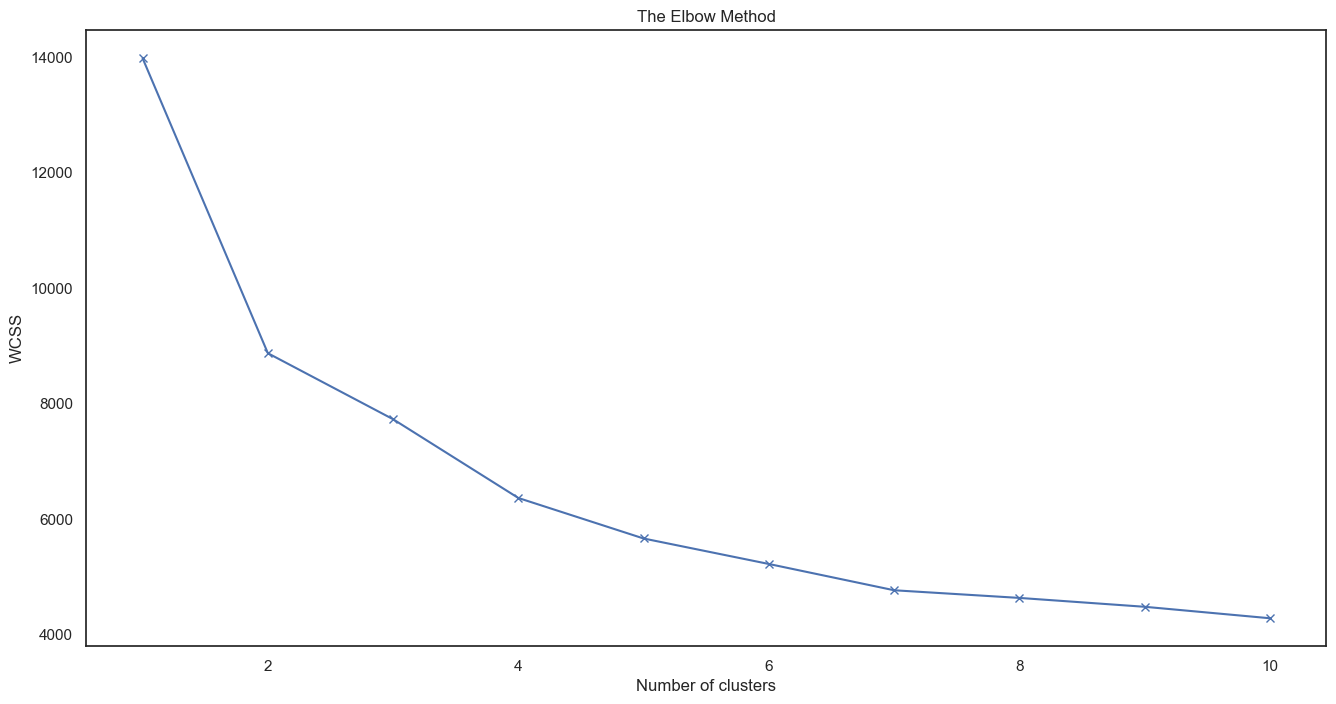

In [134]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### We can understand from the plot that cluster = 2 is the best...

In [136]:
# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(PCA_data)

KMeans(n_clusters=2, random_state=42)

In [137]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_0)
pred = kmeans.predict(X_0)

# Appending those clusters value into main dataframe (without standard-scaler)
X_0['cluster_kmeans'] = pred+1

In [138]:
X_0.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age,cluster_kmeans
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,2
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,1
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,2
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,1
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,1


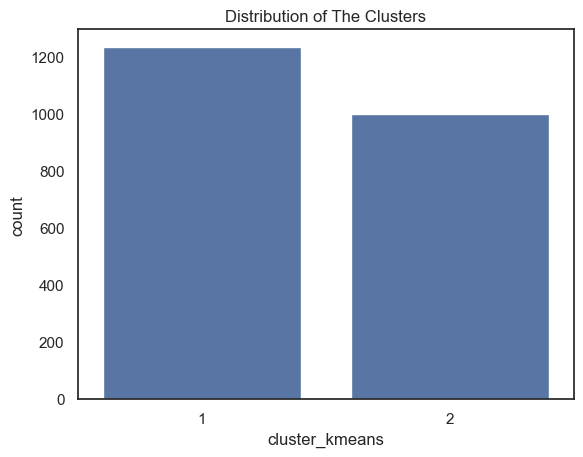

In [139]:
sns.countplot(x = X_0["cluster_kmeans"])
plt.title("Distribution of The Clusters")
plt.show()

<Axes: xlabel='Expenses', ylabel='Income'>

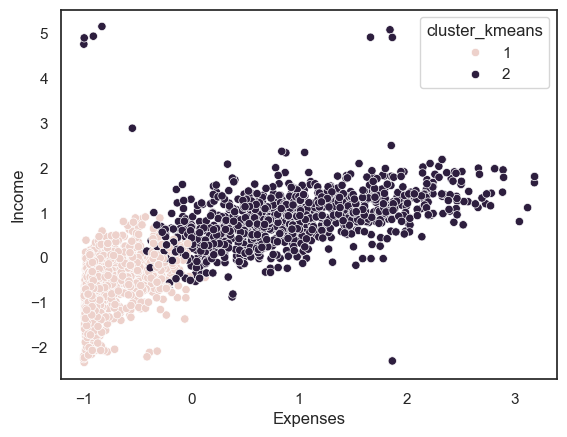

In [140]:
sns.scatterplot(x= X_0['Expenses'], y = X_0['Income'],hue=X_0['cluster_kmeans'])

In [141]:
k_score = silhouette_score(data,kmeans.labels_)

print(f'Silhouette score for K-Means Clustering is : {k_score}')

Silhouette score for K-Means Clustering is : 0.33448201992824694


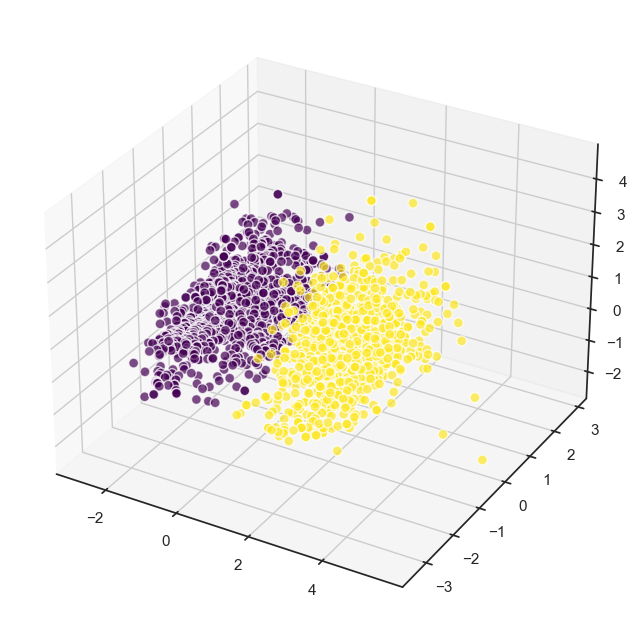

In [142]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA_data[:, 0], PCA_data[:, 1], PCA_data[:, 2], c=pred, cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.show()

## DB Scan

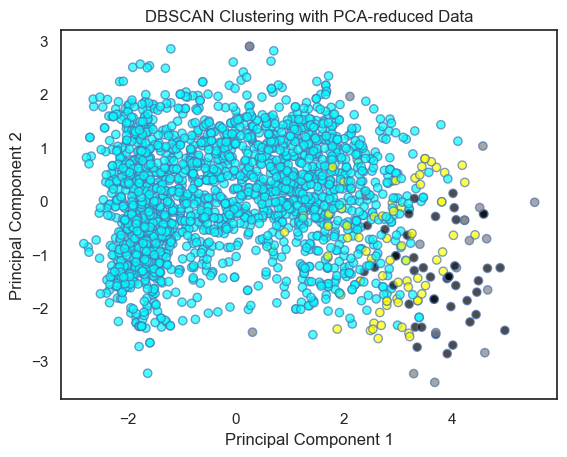

In [144]:
dbscan = DBSCAN(eps=1.0, min_samples=10)  
dbscan.fit(PCA_data)
labels = dbscan.labels_

color_palette = ['cyan', 'yellow', 'black']
colors = [color_palette[label % len(color_palette)] if label != -1 else 'grey' for label in labels]

# Scatter plot 
plt.scatter(PCA_data[:, 0], PCA_data[:, 1], c=colors, alpha=0.7, edgecolors='b')
plt.title('DBSCAN Clustering with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

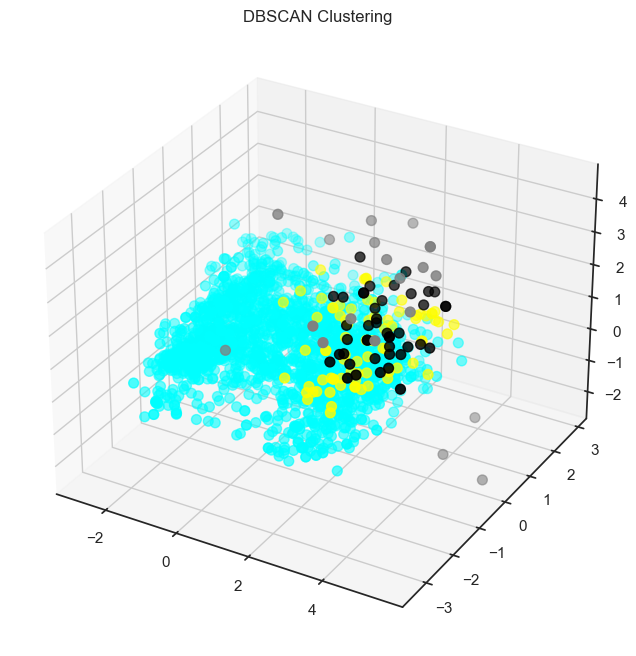

In [145]:
color_palette = ['cyan', 'yellow', 'black']

colors = [color_palette[label % len(color_palette)] if label != -1 else 'grey' for label in dbscan.labels_]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_data[:, 0], PCA_data[:, 1], PCA_data[:, 2], c=colors, s=50)
ax.set_title('DBSCAN Clustering')
plt.show()

In [146]:
db_score = silhouette_score(PCA_data, labels)

print(f'Silhouette score for DB Scan Clustering is : {db_score}')

Silhouette score for DB Scan Clustering is : 0.34756890534597507


# Model Evaluation

In [148]:
best_score_ac = -1
best_n_clusters_ac = None

for n_clusters in range(2, 10):
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    yhat_ac = ac.fit_predict(PCA_data)
    score = silhouette_score(PCA_data, yhat_ac)
    print(f'Agglomerative Clustering with {n_clusters} clusters: Silhouette Score = {score}')
    
    if score > best_score_ac:
        best_score_ac = score
        best_n_clusters_ac = n_clusters

print(f'Best Silhouette Score for Agglomerative Clustering: {best_score_ac} with {best_n_clusters_ac} clusters')

Agglomerative Clustering with 2 clusters: Silhouette Score = 0.3956939272180901
Agglomerative Clustering with 3 clusters: Silhouette Score = 0.3514244308862515
Agglomerative Clustering with 4 clusters: Silhouette Score = 0.32847567919742693
Agglomerative Clustering with 5 clusters: Silhouette Score = 0.32373876870885626
Agglomerative Clustering with 6 clusters: Silhouette Score = 0.30269613120385336
Agglomerative Clustering with 7 clusters: Silhouette Score = 0.29624098522934317
Agglomerative Clustering with 8 clusters: Silhouette Score = 0.31175465230951555
Agglomerative Clustering with 9 clusters: Silhouette Score = 0.30468850045422047
Best Silhouette Score for Agglomerative Clustering: 0.3956939272180901 with 2 clusters


In [149]:
best_score_kmeans = -1
best_n_clusters_kmeans = None

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    pred_kmeans = kmeans.fit_predict(PCA_data)
    score = silhouette_score(PCA_data, pred_kmeans)
    print(f'KMeans with {n_clusters} clusters: Silhouette Score = {score}')
    
    if score > best_score_kmeans:
        best_score_kmeans = score
        best_n_clusters_kmeans = n_clusters

print(f'Best Silhouette Score for KMeans: {best_score_kmeans} with {best_n_clusters_kmeans} clusters')

KMeans with 2 clusters: Silhouette Score = 0.43173042608237844
KMeans with 3 clusters: Silhouette Score = 0.33912443162292877
KMeans with 4 clusters: Silhouette Score = 0.3682883406860395
KMeans with 5 clusters: Silhouette Score = 0.3396404774942158
KMeans with 6 clusters: Silhouette Score = 0.34458290255594415
KMeans with 7 clusters: Silhouette Score = 0.3542490509582001
KMeans with 8 clusters: Silhouette Score = 0.2961031979717176
KMeans with 9 clusters: Silhouette Score = 0.3037266687339823
Best Silhouette Score for KMeans: 0.43173042608237844 with 2 clusters


In [150]:
best_score_dbscan = -1
best_eps = None
best_min_samples = None

eps_values = [0.1,0.2,0.3,0.4,0.5]
min_samples_values = range(2,8)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(PCA_data)
        
        if len(set(labels_dbscan)) > 1:  # More than one cluster
            score = silhouette_score(PCA_data, labels_dbscan)
            print(f'DBSCAN with eps={eps}, min_samples={min_samples}: Silhouette Score = {score}')
            
            if score > best_score_dbscan:
                best_score_dbscan = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best Silhouette Score for DBSCAN: {best_score_dbscan} with eps={best_eps}, min_samples={best_min_samples}')

DBSCAN with eps=0.1, min_samples=2: Silhouette Score = -0.15610211106608934
DBSCAN with eps=0.1, min_samples=3: Silhouette Score = -0.3606164114386511
DBSCAN with eps=0.1, min_samples=4: Silhouette Score = -0.4171173438977016
DBSCAN with eps=0.1, min_samples=5: Silhouette Score = -0.47068572321243846
DBSCAN with eps=0.1, min_samples=6: Silhouette Score = -0.48047054718840837
DBSCAN with eps=0.1, min_samples=7: Silhouette Score = -0.4550285714364
DBSCAN with eps=0.2, min_samples=2: Silhouette Score = -0.43533123740526597
DBSCAN with eps=0.2, min_samples=3: Silhouette Score = -0.4229768969967677
DBSCAN with eps=0.2, min_samples=4: Silhouette Score = -0.34539112649995396
DBSCAN with eps=0.2, min_samples=5: Silhouette Score = -0.363071588357578
DBSCAN with eps=0.2, min_samples=6: Silhouette Score = -0.3895569015455891
DBSCAN with eps=0.2, min_samples=7: Silhouette Score = -0.4350333471126992
DBSCAN with eps=0.3, min_samples=2: Silhouette Score = -0.30276064598930347
DBSCAN with eps=0.3, mi

#### Hence K-Means clustering is giving best silhouette score for two clusters. We are going to build the final clustering model using K-Means clustering algorithm.

In [155]:
X_0['cluster_kmeans'] = X_0['cluster_kmeans'].replace(1,'cluster_1')

In [156]:
X_0['cluster_kmeans'] = X_0['cluster_kmeans'].replace(2,'cluster_2')

In [157]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298


In [158]:
import pickle

In [159]:
pickle.dump(kmeans,open("kmeans.pkl","wb"))

In [160]:
kmeans = pickle.load(open("kmeans.pkl","rb"))

In [161]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298


In [162]:
feature_columns = ['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses', 
                   'TotalAcceptedCmp', 'NumTotalPurchases', 'customer_Age']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_0[feature_columns])

pca = PCA(n_components=3)
PCA_data = pca.fit_transform(X_scaled)

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(PCA_data)

# Clustering Function
def clustering(Education, Marital_Status, Income, Kids, Expenses, TotalAcceptedCmp, 
               NumTotalPurchases, customer_Age):
    # Create new customer data
    new_customer = np.array([[Education, Marital_Status, Income, Kids, Expenses, 
                               TotalAcceptedCmp, NumTotalPurchases, customer_Age]])
    
    # Scale the new customer data
    new_customer_scaled = scaler.transform(new_customer)
    
    # Apply PCA to the new customer data
    new_customer_pca = pca.transform(new_customer_scaled)
    
    # Predict the cluster
    predicted_cluster = kmeans.predict(new_customer_pca)
    
    # Return cluster name
    if predicted_cluster[0] == 1:
        return "cluster_1"
    else:
        return "cluster_2"

In [163]:
# New Customer Details
Education = 1
Marital_Status = 0
Income = 10000
Kids = 4
Expenses = 1000        
TotalAcceptedCmp = 0
NumTotalPurchases = 2
customer_Age = 58

# Predict the cluster
predicted_cluster = clustering(Education, Marital_Status, Income, Kids, Expenses, 
                                TotalAcceptedCmp, NumTotalPurchases, customer_Age)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

New Customer assigned to Cluster: cluster_1


In [164]:
Education = 1
Marital_Status = 2
Income = 2500000
Kids =0
Expenses = 133.0        
TotalAcceptedCmp = 1
NumTotalPurchases = 6
customer_Age = 12

predicted_cluster = clustering(Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,customer_Age)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

New Customer assigned to Cluster: cluster_1


# Conclusions:

##  Cluster 1:
##  People with less expenses :-
### People who are married and parents of more than 3 kids
### People with low income

##  Cluster 2:
##  People with more expenses :-
### People who are single or parents of less than 3 kids
### People with high income